In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
load_columns = ['zz', 'vx', 'vy', 'vzz', 'rudder_demanded', 'propeller_demanded', 'distance_midline', 'distance_target', 'cog', 'sog', 'local_cog']

C:\Users\AlphaCrucis_Control1\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Dados carregados: 627974, 12


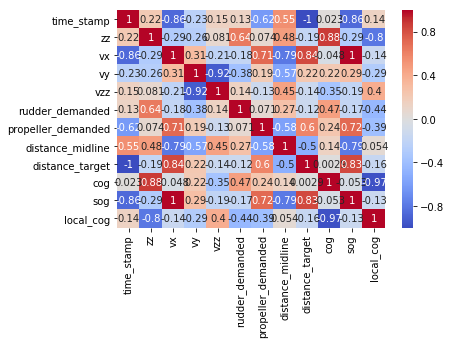

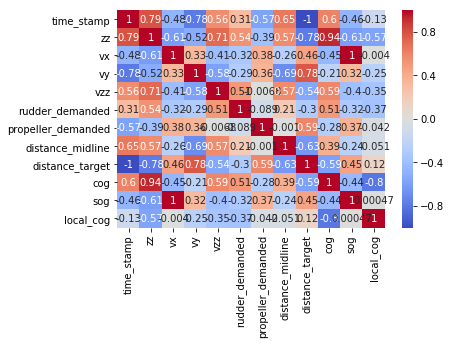

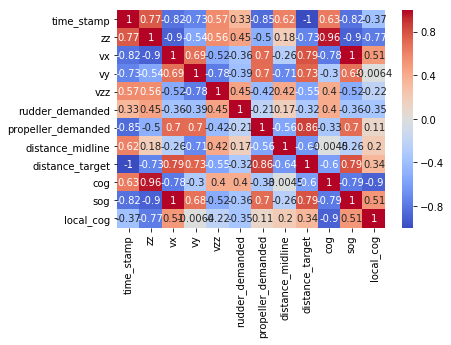

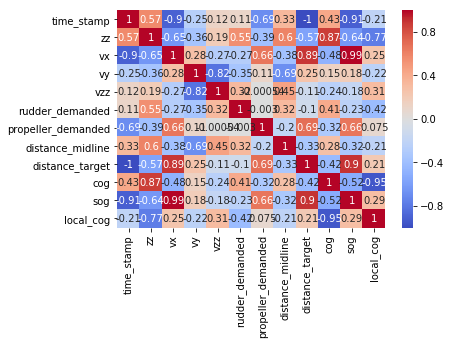

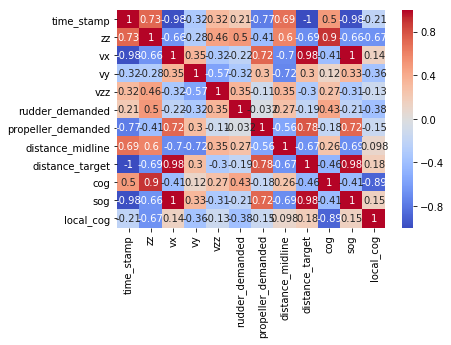

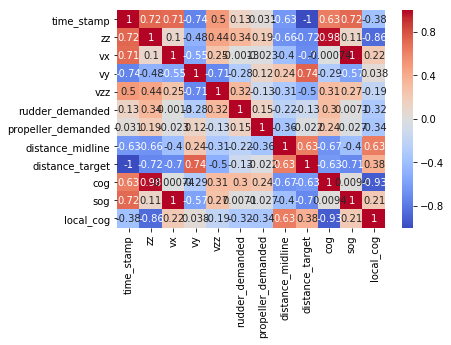

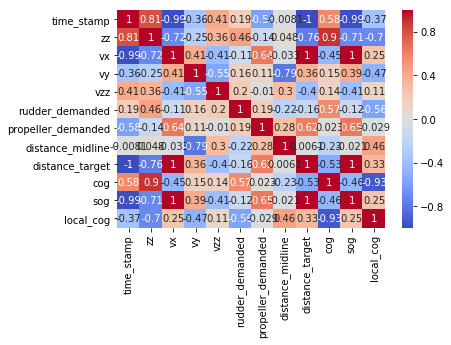

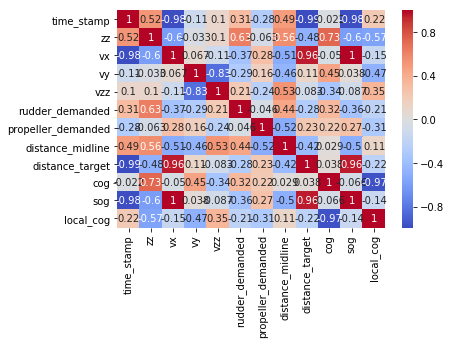

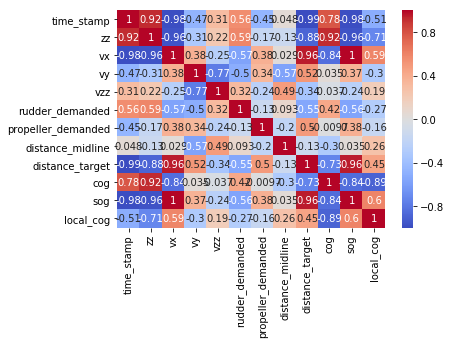

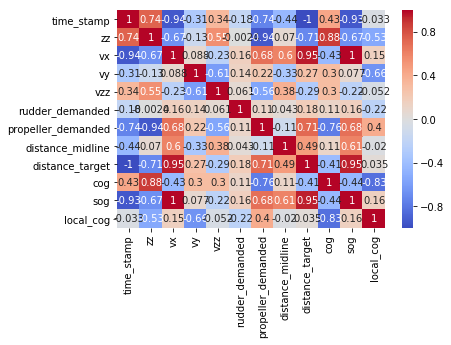

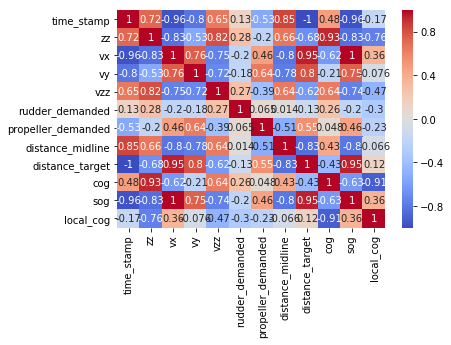

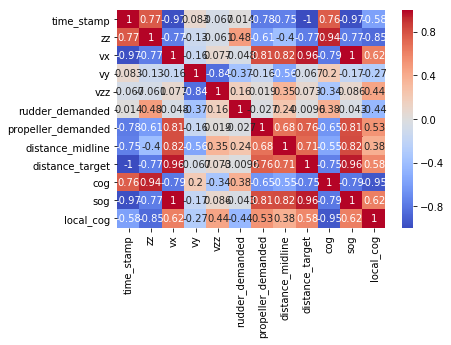

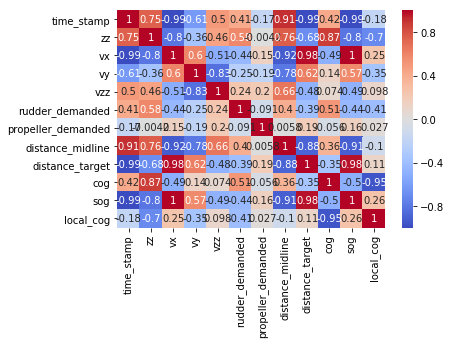

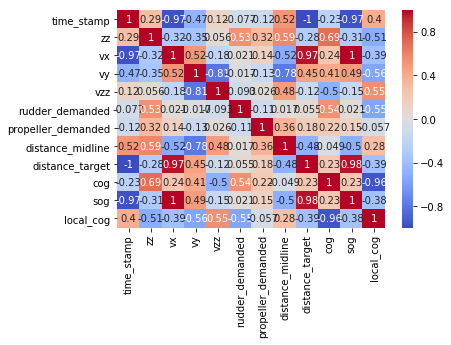

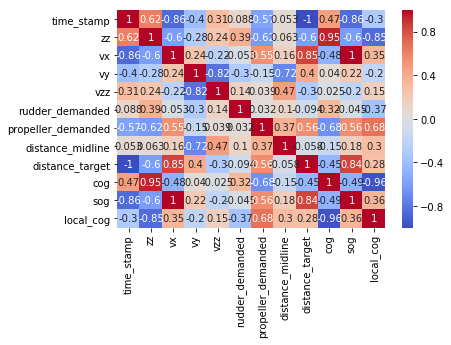

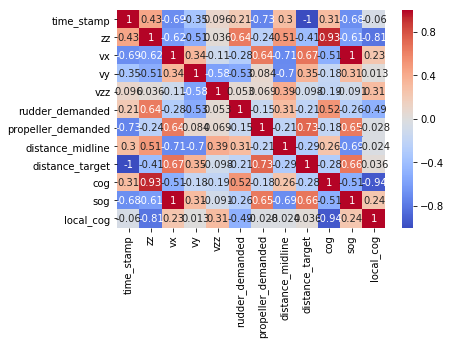

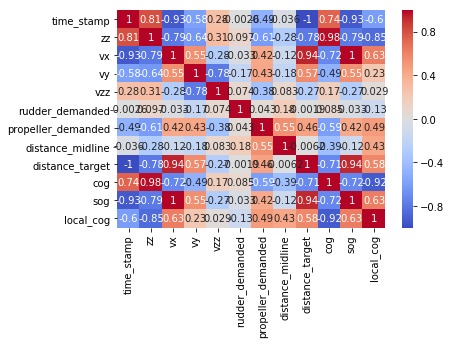

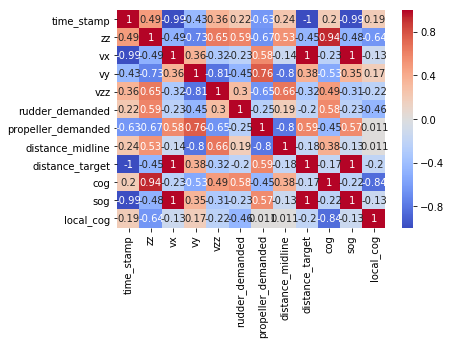

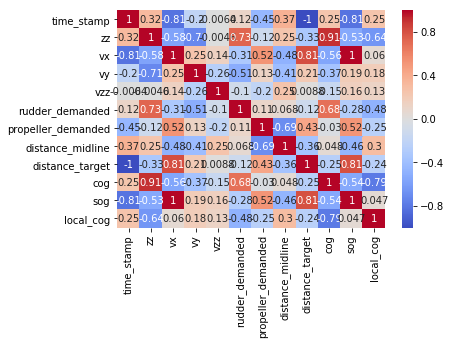

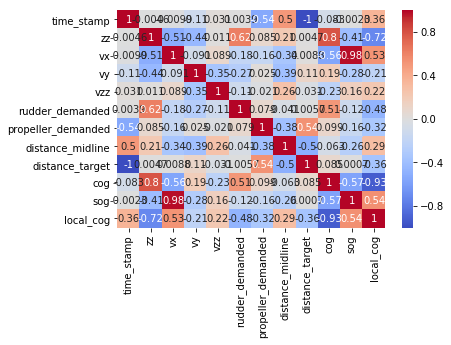

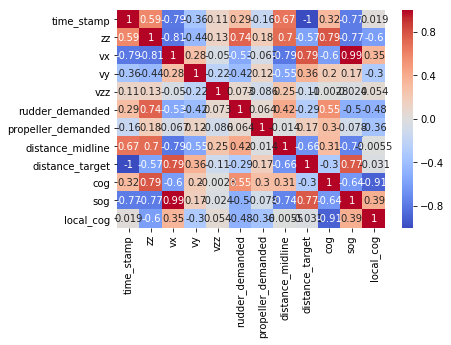

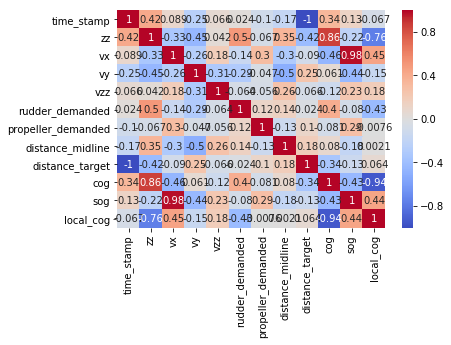

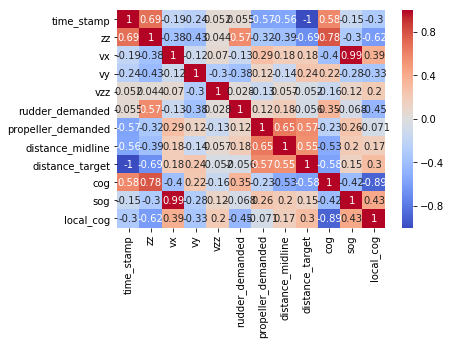

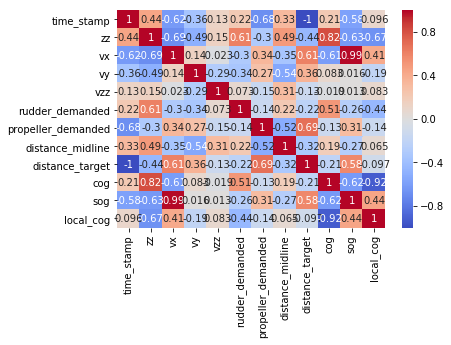

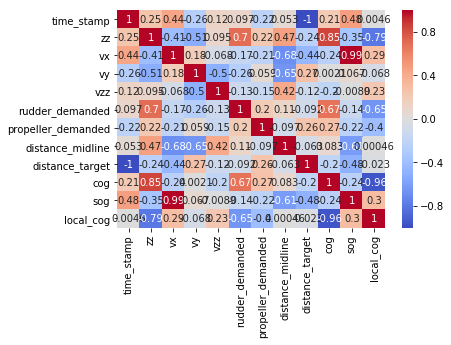

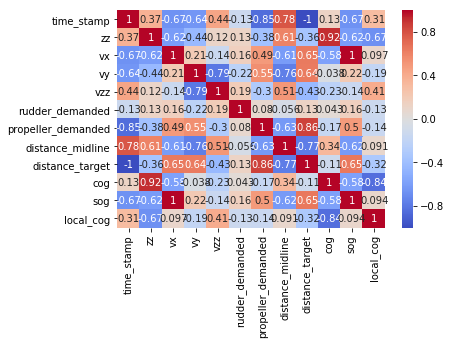

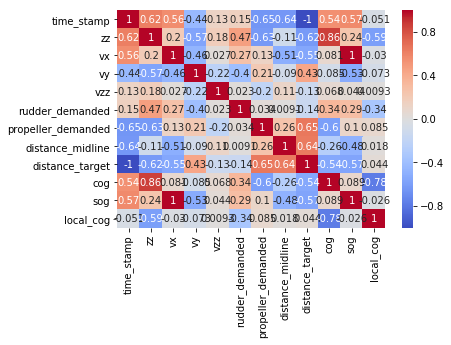

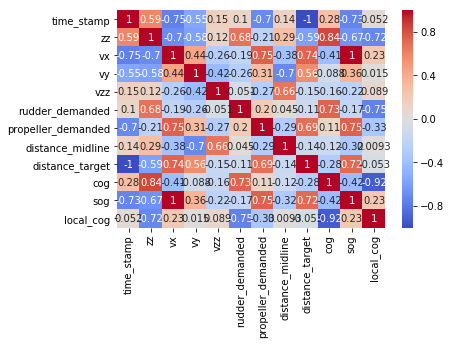

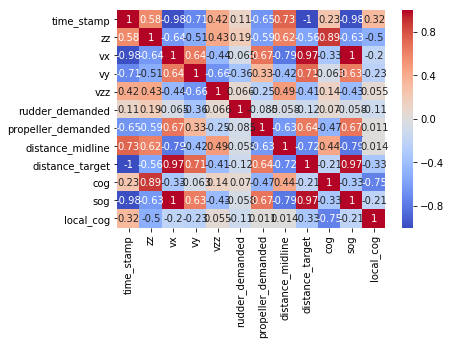

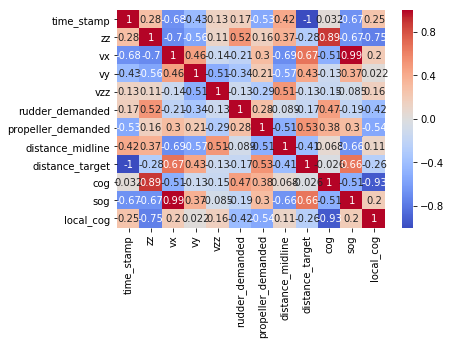

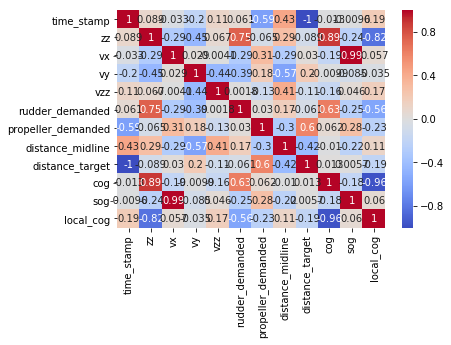

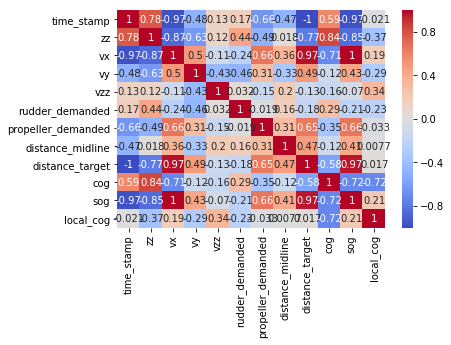

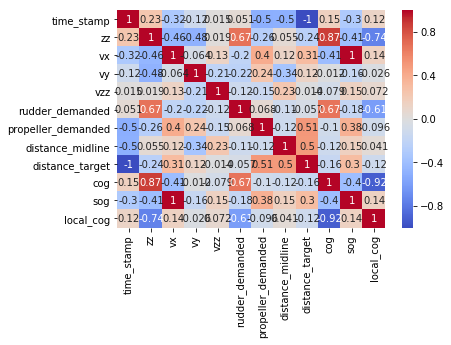

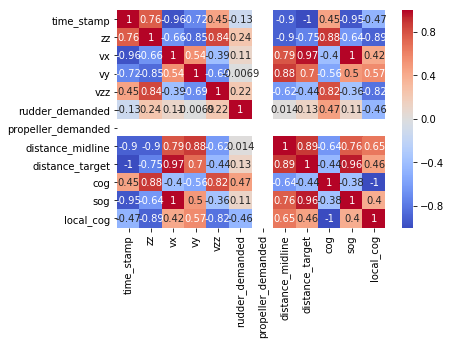

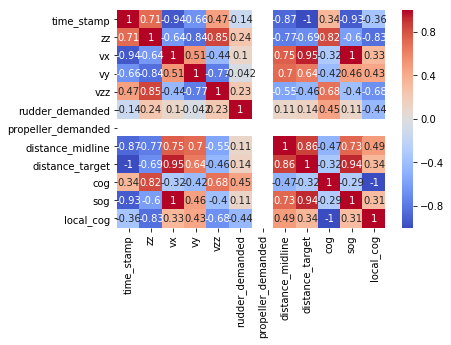

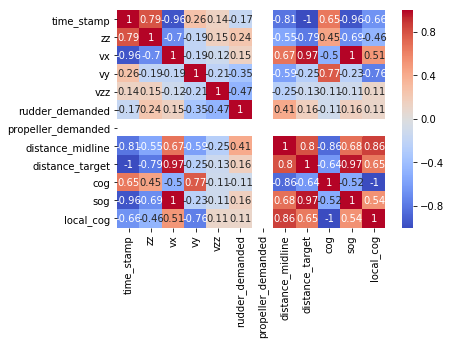

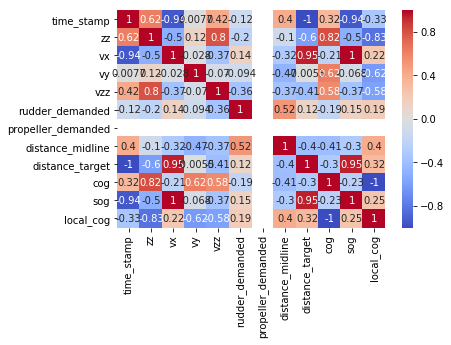

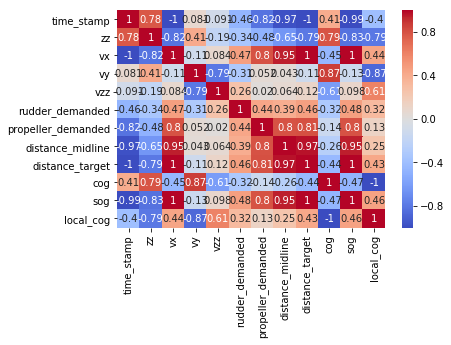

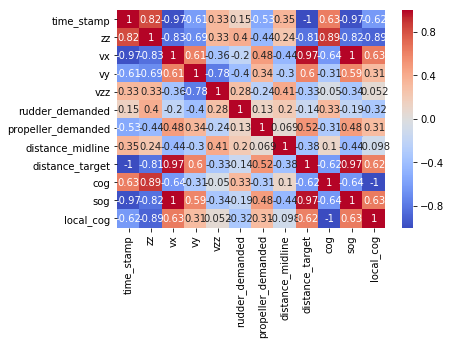

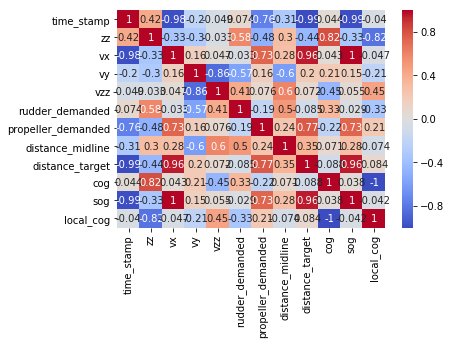

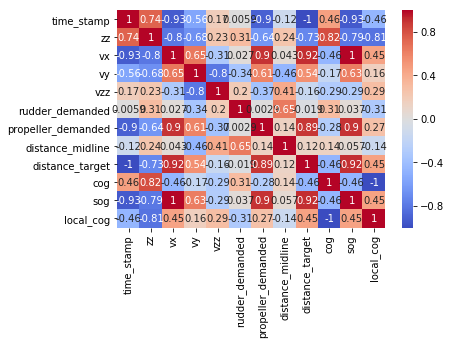

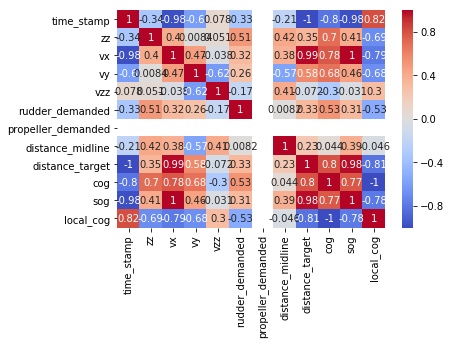

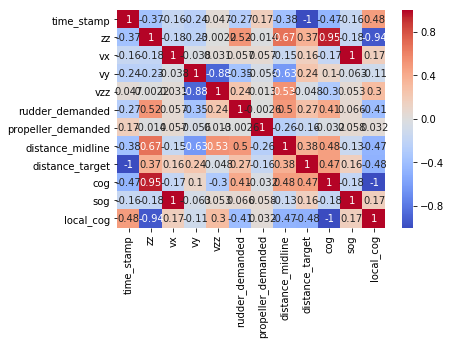

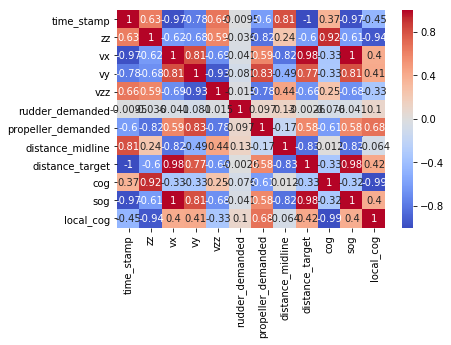

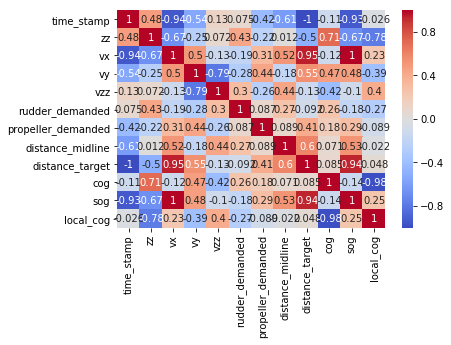

In [3]:
loc='C:\\Users\\AlphaCrucis_Control1\\PycharmProjects\\Data_Filter\\Output\\Compilado\\'
file = os.listdir(loc)
df = pd.DataFrame()
limits = list()
for f in file:
    path = loc + f
    dt = pd.read_csv(path, sep=" ", skiprows=11)
    plt.figure()
    sns.heatmap(dt.corr(), cmap='coolwarm', annot=True)
    df = df.append(dt, ignore_index=True)
    limits.append(df.shape[0]-1)
print('Dados carregados: ' + str(df.shape[0]) + ', ' + str(df.shape[1]))

In [5]:
df.corr()['rudder_demanded']

time_stamp            0.134594
zz                    0.047110
vx                   -0.178957
vy                   -0.247024
vzz                   0.056113
rudder_demanded       1.000000
propeller_demanded    0.012786
distance_midline      0.153496
distance_target      -0.101055
cog                   0.023981
sog                  -0.169159
local_cog            -0.019627
Name: rudder_demanded, dtype: float64

In [26]:
def get_signal(row, column):
    if row[column] > 0:
        return 1
    else:
        return 0

df['sig_midline'] = df.apply(lambda row: get_signal(row, 'distance_midline'), axis=1)
df['sig_zz'] = df.apply(lambda row: get_signal(row, 'zz'), axis=1)
df['sig_vzz'] = df.apply(lambda row: get_signal(row, 'vzz'), axis=1)
df['sig_vx'] = df.apply(lambda row: get_signal(row, 'vx'), axis=1)
df['sig_vy'] = df.apply(lambda row: get_signal(row, 'vy'), axis=1)
df.head()

,zz,vx,vy,vzz,rudder_demanded,propeller_demanded,distance_midline,distance_target,sig_midline,sig_zz,sig_vzz,sig_vx,sig_vy
0,-160.81,4.19,-0.18,-0.05,0.0,2,-32.879,6024.934,0,0,0,1,0
1,-160.82,4.19,-0.18,-0.05,0.0,2,-32.911,6024.514,0,0,0,1,0
2,-160.82,4.19,-0.18,-0.05,0.0,2,-32.934,6024.097,0,0,0,1,0
3,-160.83,4.19,-0.18,-0.05,0.0,2,-32.954,6023.670,0,0,0,1,0
4,-160.83,4.19,-0.18,-0.05,0.0,2,-32.976,6023.253,0,0,0,1,0


In [23]:
df[(df['distance_midline'] < -125) & (df['sig_midline'] == 1)]

,zz,vx,vy,vzz,rudder_demanded,propeller_demanded,distance_midline,distance_target,sig_midline


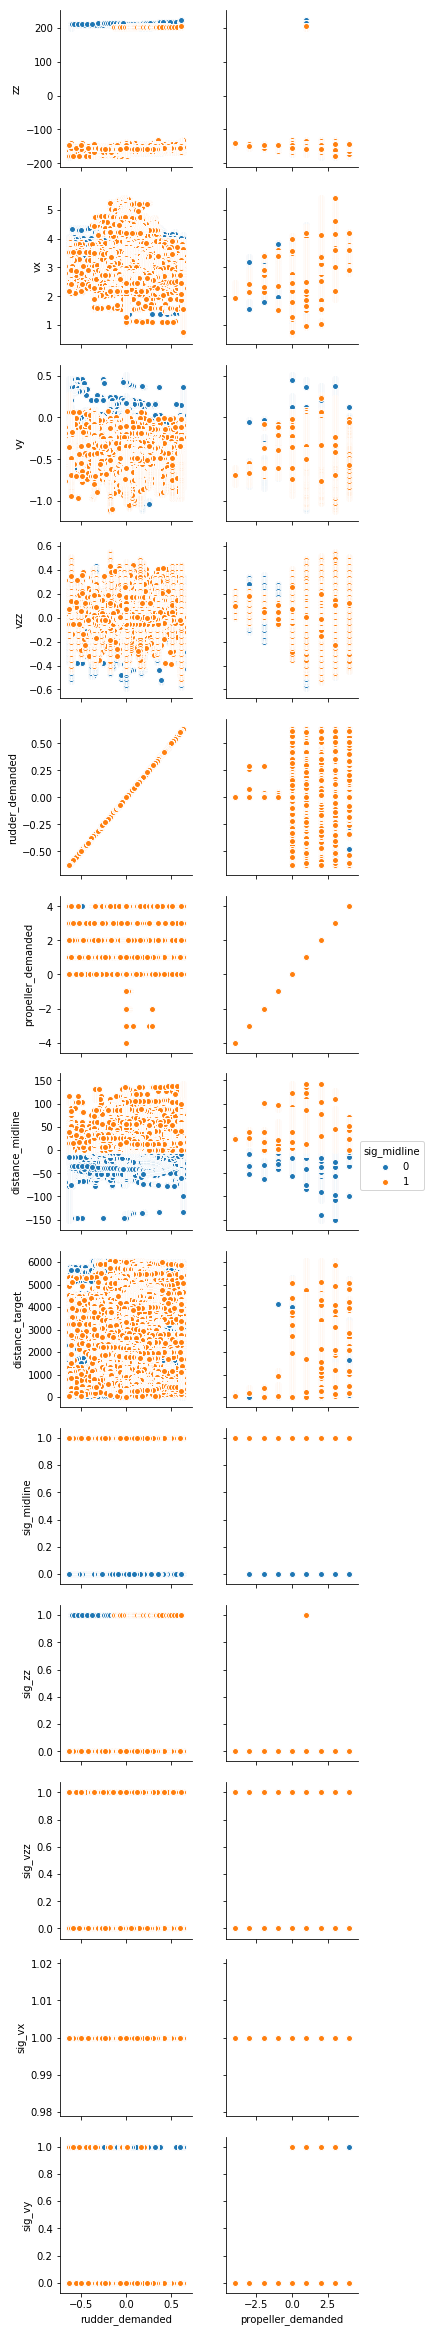

In [27]:
g = sns.pairplot(data=df, diag_kind='auto', hue=['sig_vx'], x_vars=['rudder_demanded', 'propeller_demanded'], y_vars=df.columns)